<a href="https://colab.research.google.com/github/antndlcrx/Intro-to-Python-DPIR/blob/main/Week%207/W7_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/logo_dpir.png?raw=true:,  width=35" alt="My Image" width=175>

# Word Embeddings, Spacy, NLTK

##  **1**.&nbsp; **NLTK**

[NLTK](https://www.nltk.org/) is a flexible and powerful library for Natural Language Processing (NLP) in Python. It provides a wide range of **pre-built NLP tools, linguistic resources, and corpora**, making it a great choice for **educational purposes, research, and lightweight text processing**. While **not as fast as spaCy** for large-scale applications, NLTK excels in classical NLP tasks, linguistic exploration, and rule-based text analysis.

**Key Features of NLTK**
- **Lightweight & Resource-Efficient**: Ideal for quick NLP experiments, simple text analytics, and rule-based processing.
- **Extensive Corpora & Lexical Resources**: Includes large linguistic datasets, such as WordNet, stopword lists, and pre-tagged corpora.
- **Pre-built NLP Tools**: Supports tokenization, stemming, lemmatization, POS tagging, chunking, and parsing.

**Core NLP Tasks in NLTK**
- **Tokenization**: Splitting text into sentences or words.
- **Stopword Removal**: Filtering out common words (e.g., "the", "is") that add little meaning.
- **Stemming & Lemmatization**: Reducing words to their base or root form (e.g., "running" → "run").
- **Part-of-Speech (POS) Tagging**: Assigning grammatical labels (noun, verb, adjective, etc.) to words.
- **Named Entity Recognition (NER)**: Identifying people, places, and organizations in text.
- **Parsing & Syntax Analysis**: Understanding grammatical structure.

**When to Use NLTK?**
- **For linguistic research & education**: Offers a deep dive into NLP fundamentals.  
- **For quick text processing tasks**: Easy to use for tokenization, tagging, and rule-based methods.  
- **For working with linguistic corpora**: Provides access to WordNet, treebanks, and annotated datasets.  

See the [Examples](https://www.nltk.org/howto.html).


Part-of-Speech tags.


| Tag   | Description                                      |
|-------|--------------------------------------------------|
| CC    | Coordinating conjunction (e.g., and, but, or)    |
| CD    | Cardinal number (e.g., one, two)                 |
| DT    | Determiner (e.g., the, a, an, this)              |
| EX    | Existential there (e.g., there is ...)           |
| FW    | Foreign word                                     |
| IN    | Preposition or subordinating conjunction (e.g., of, in, by) |
| JJ    | Adjective (e.g., happy, quick)                   |
| JJR   | Adjective, comparative (e.g., happier, faster)   |
| JJS   | Adjective, superlative (e.g., happiest, fastest) |
| LS    | List item marker                                 |
| MD    | Modal (e.g., can, will, should)                  |
| NN    | Noun, singular or mass (e.g., dog, truth)        |
| NNS   | Noun, plural (e.g., dogs)                        |
| NNP   | Proper noun, singular (e.g., John, London)       |
| NNPS  | Proper noun, plural (e.g., Smiths)               |
| PDT   | Predeterminer (e.g., all, both, half)            |
| POS   | Possessive ending ('s)                           |
| PRP   | Personal pronoun (e.g., I, you, he, she)         |
| PRP\$  | Possessive pronoun (e.g., my, your, their)       |
| RB    | Adverb (e.g., quickly, never)                    |
| RBR   | Adverb, comparative (e.g., faster, better)       |
| RBS   | Adverb, superlative (e.g., fastest, best)        |
| RP    | Particle (e.g., up, off in phrasal verbs like break **up**) |
| SYM   | Symbol (e.g., \$, %, §)                           |
| TO    | “to” as a preposition or infinitive marker       |
| UH    | Interjection (e.g., oh, wow)                     |
| VB    | Verb, base form (e.g., run)                      |
| VBD   | Verb, past tense (e.g., ran)                     |
| VBG   | Verb, gerund or present participle (e.g., running) |
| VBN   | Verb, past participle (e.g., run, eaten)         |
| VBP   | Verb, non-3rd person singular present (e.g., run for I/we/you/they) |
| VBZ   | Verb, 3rd person singular present (e.g., runs for he/she/it) |
| WDT   | Wh-determiner (e.g., which, that)                |
| WP    | Wh-pronoun (e.g., who, what)                     |
| WP\$   | Possessive wh-pronoun (e.g., whose)              |
| WRB   | Wh-adverb (e.g., where, when)                    |


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab') # pre-trained models and rules for splitting text into sentences and words, handling punctuation, abbreviations, etc.
nltk.download('averaged_perceptron_tagger_eng') # language-specific part-of-speech (POS) tagging model
nltk.download('stopwords') # list of common words (like "the", "is", "and") to filter out in text processing
nltk.download('wordnet') # WordNet lexical database, used for lemmatization (reducing words to base forms)
nltk.download('words') # a general corpus of English words.
nltk.download('vader_lexicon') # Valence Aware Dictionary and Sentiment Reasoner


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/edwardanders/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/edwardanders/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/edwardanders/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/edwardanders/nltk_data...
[nltk_data] Downloading package words to
[nltk_data]     /Users/edwardanders/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/edwardanders/nltk_data...


True

In [4]:
text = "On Friday evening last I received His Majesty’s commission to form a new Administration. It is the evident wish and will of Parliament and the nation that this should be conceived on the broadest possible basis and that it should include all parties, both those who supported the late Government and also the parties of the Opposition. I have completed the most important part of this task. A War Cabinet has been formed of five Members, representing, with the Opposition Liberals, the unity of the nation. The three party Leaders have agreed to serve, either in the War Cabinet or in high executive office. The three Fighting Services have been filled. It was necessary that this should be done in one single day, on account of the extreme urgency and rigour of events. A number of other positions, key positions, were filled yesterday, and I am submitting a further list to His Majesty to-night. I hope to complete the appointment of the principal Ministers during to-morrow. The appointment of the other Ministers usually takes a little longer, but I trust that, when Parliament meets again, this part of my task will be completed, and that the administration will be complete in all respects. I considered it in the public interest to suggest that the House should be summoned to meet today. Mr. Speaker agreed, and took the necessary steps, in accordance with the powers conferred upon him by the Resolution of the House. At the end of the proceedings today, the Adjournment of the House will be proposed until Tuesday, 21st May, with, of course, provision for earlier meeting, if need be. The business to be considered during that week will be notified to Members at the earliest opportunity. I now invite the House, by the Motion which stands in my name, to record its approval of the steps taken and to declare its confidence in the new Government. To form an Administration of this scale and complexity is a serious undertaking in itself, but it must be remembered that we are in the preliminary stage of one of the greatest battles in history, that we are in action at many other points in Norway and in Holland, that we have to be prepared in the Mediterranean, that the air battle is continuous and that many preparations, such as have been indicated by my hon. Friend below the Gangway, have to be made here at home. In this crisis I hope I may be pardoned if I do not address the House at any length today. I hope that any of my friends and colleagues, or former colleagues, who are affected by the political reconstruction, will make allowance, all allowance, for any lack of ceremony with which it has been necessary to act. I would say to the House, as I said to those who have joined this government: “I have nothing to offer but blood, toil, tears and sweat.” We have before us an ordeal of the most grievous kind. We have before us many, many long months of struggle and of suffering. You ask, what is our policy? I can say: It is to wage war, by sea, land and air, with all our might and with all the strength that God can give us; to wage war against a monstrous tyranny, never surpassed in the dark, lamentable catalogue of human crime. That is our policy. You ask, what is our aim? I can answer in one word: It is victory, victory at all costs, victory in spite of all terror, victory, however long and hard the road may be; for without victory, there is no survival. Let that be realised; no survival for the British Empire, no survival for all that the British Empire has stood for, no survival for the urge and impulse of the ages, that mankind will move forward towards its goal. But I take up my task with buoyancy and hope. I feel sure that our cause will not be suffered to fail among men. At this time I feel entitled to claim the aid of all, and I say, “come then, let us go forward together with our united strength.”"
text

'On Friday evening last I received His Majesty’s commission to form a new Administration. It is the evident wish and will of Parliament and the nation that this should be conceived on the broadest possible basis and that it should include all parties, both those who supported the late Government and also the parties of the Opposition. I have completed the most important part of this task. A War Cabinet has been formed of five Members, representing, with the Opposition Liberals, the unity of the nation. The three party Leaders have agreed to serve, either in the War Cabinet or in high executive office. The three Fighting Services have been filled. It was necessary that this should be done in one single day, on account of the extreme urgency and rigour of events. A number of other positions, key positions, were filled yesterday, and I am submitting a further list to His Majesty to-night. I hope to complete the appointment of the principal Ministers during to-morrow. The appointment of th

In [ ]:
#@title Example: Text processing with NLTK

# 1. Tokenization: Split the text into words
tokens = word_tokenize(text) # split text into words

# 2. Part-of-Speech (POS) Tagging
pos_tags = nltk.pos_tag(tokens)

# 3. Removing Stopwords (common words like 'the', 'on', etc.)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# 4. Lemmatization: Convert words to their base form
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("Lemmatized Tokens:", lemmatized_tokens)

fd = nltk.FreqDist(tokens) # lemmatized_tokens
fd.tabulate()

# fd.most_common(3)

# sentiment intensity analyser
from nltk.sentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()
sa.polarity_scores(text)

Lemmatized Tokens: ['Friday', 'evening', 'last', 'received', 'Majesty', '’', 'commission', 'form', 'new', 'Administration', '.', 'evident', 'wish', 'Parliament', 'nation', 'conceived', 'broadest', 'possible', 'basis', 'include', 'party', ',', 'supported', 'late', 'Government', 'also', 'party', 'Opposition', '.', 'completed', 'important', 'part', 'task', '.', 'War', 'Cabinet', 'formed', 'five', 'Members', ',', 'representing', ',', 'Opposition', 'Liberals', ',', 'unity', 'nation', '.', 'three', 'party', 'Leaders', 'agreed', 'serve', ',', 'either', 'War', 'Cabinet', 'high', 'executive', 'office', '.', 'three', 'Fighting', 'Services', 'filled', '.', 'necessary', 'done', 'one', 'single', 'day', ',', 'account', 'extreme', 'urgency', 'rigour', 'event', '.', 'number', 'position', ',', 'key', 'position', ',', 'filled', 'yesterday', ',', 'submitting', 'list', 'Majesty', 'to-night', '.', 'hope', 'complete', 'appointment', 'principal', 'Ministers', 'to-morrow', '.', 'appointment', 'Ministers', 'us

{'neg': 0.107, 'neu': 0.769, 'pos': 0.123, 'compound': 0.8302}

In [ ]:
#@title Exercise

# 1. Your goal is to assess the "sentiment" of provided text. To do that, find and record all adjectives in the text.
tokens = word_tokenize(text)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Extract adjectives (JJ, JJR, JJS)
adjectives = [word for word in pos_tags if word in ["JJ", "JJR", "JJS"]]

# Print adjectives
print("Adjectives:", adjectives)


# Then, print all the adjectives. What kind of "sentiment" you think communicate?

# 2. Repeat the same but with adverbs and verbs. Did your perception change?

Lemmatized Tokens: ['Friday', 'evening', 'last', 'received', 'Majesty', '’', 'commission', 'form', 'new', 'Administration', '.', 'evident', 'wish', 'Parliament', 'nation', 'conceived', 'broadest', 'possible', 'basis', 'include', 'party', ',', 'supported', 'late', 'Government', 'also', 'party', 'Opposition', '.', 'completed', 'important', 'part', 'task', '.', 'War', 'Cabinet', 'formed', 'five', 'Members', ',', 'representing', ',', 'Opposition', 'Liberals', ',', 'unity', 'nation', '.', 'three', 'party', 'Leaders', 'agreed', 'serve', ',', 'either', 'War', 'Cabinet', 'high', 'executive', 'office', '.', 'three', 'Fighting', 'Services', 'filled', '.', 'necessary', 'done', 'one', 'single', 'day', ',', 'account', 'extreme', 'urgency', 'rigour', 'event', '.', 'number', 'position', ',', 'key', 'position', ',', 'filled', 'yesterday', ',', 'submitting', 'list', 'Majesty', 'to-night', '.', 'hope', 'complete', 'appointment', 'principal', 'Ministers', 'to-morrow', '.', 'appointment', 'Ministers', 'us

[]

## **2**.&nbsp; **Spacy**

[spaCy](https://spacy.io/) is a modern, high-performance library for Natural Language Processing (NLP) in Python. Developed for industrial-strength applications, it provides efficient and accurate text processing pipelines, covering tasks like **tokenization, part-of-speech tagging, dependency parsing, and named entity recognition**. SpaCy's design emphasises speed, modularity, and scalability, making it ideal for large-scale NLP projects. It supports multiple languages and integrates well with machine learning frameworks.

**Core Components of spaCy**
In spaCy, textual data is structured into three main objects:

- **Doc**: Represents the entire processed text, containing annotations such as **POS tags, dependencies, named entities, and sentence boundaries**.
- **Token**: Each **word, punctuation mark, or symbol** in a Doc is a Token, enriched with **linguistic metadata** (e.g., part of speech, lemma, stopword status).
- **Span**: A Span is a **contiguous slice of tokens** within a Doc, useful for recognising **multi-word expressions** (e.g., treating “New York” as a single entity).

**Key Features of spaCy**
- **Pre-trained NLP Models**: SpaCy offers **pre-trained models** (`en_core_web_sm`, `fr_core_news_md`, etc.) for various languages.
- **Custom Pipelines**: Allows users to add or modify pipeline components, such as entity recognisers or text classifiers.
- **Word Vectors & Embeddings**: Supports **pre-trained word embeddings** (e.g., GloVe, FastText) for semantic analysis.
- **Sentence Segmentation**: Automatically detects sentence boundaries, crucial for document-level NLP.
- **Large-Scale Efficiency**: SpaCy processes text faster than NLTK and can handle large datasets with ease.

See [Documentation and Guide](https://spacy.io/usage/spacy-101).


In [35]:
import spacy

In [36]:
text = "We have before us an ordeal of the most grievous kind. We have before us many, many long months of struggle and of suffering. You ask, what is our policy? I can say: It is to wage war, by sea, land and air, with all our might and with all the strength that God can give us; to wage war against a monstrous tyranny, never surpassed in the dark, lamentable catalogue of human crime. That is our policy. You ask, what is our aim? I can answer in one word: It is victory, victory at all costs, victory in spite of all terror, victory, however long and hard the road may be; for without victory, there is no survival. Let that be realised; no survival for the British Empire, no survival for all that the British Empire has stood for, no survival for the urge and impulse of the ages, that mankind will move forward towards its goal. But I take up my task with buoyancy and hope. I feel sure that our cause will not be suffered to fail among men. At this time I feel entitled to claim the aid of all, and I say, “come then, let us go forward together with our united strength."

In [ ]:
nlp = spacy.load("en_core_web_sm") # Loads the English-language NLP model from spaCy
doc = nlp(text)
for token in doc:
    print(token.text, token.pos_, token.lemma_, token.dep_) # Print the token text, POS tag, lemma, and dependency label

We PRON we nsubj
have VERB have ROOT
before ADP before prep
us PRON we pobj
an DET an det
ordeal NOUN ordeal dobj
of ADP of prep
the DET the det
most ADV most advmod
grievous ADJ grievous amod
kind NOUN kind pobj
. PUNCT . punct
We PRON we nsubj
have VERB have ROOT
before ADP before prep
us PRON we pobj
many ADJ many amod
, PUNCT , punct
many ADJ many amod
long ADJ long amod
months NOUN month dobj
of ADP of prep
struggle NOUN struggle pobj
and CCONJ and cc
of ADP of prep
suffering NOUN suffering pobj
. PUNCT . punct
You PRON you nsubj
ask VERB ask ROOT
, PUNCT , punct
what PRON what attr
is AUX be ccomp
our PRON our poss
policy NOUN policy nsubj
? PUNCT ? punct
I PRON I nsubj
can AUX can aux
say VERB say ROOT
: PUNCT : punct
It PRON it nsubj
is AUX be ccomp
to PART to aux
wage VERB wage xcomp
war NOUN war dobj
, PUNCT , punct
by ADP by prep
sea NOUN sea pobj
, PUNCT , punct
land NOUN land conj
and CCONJ and cc
air NOUN air conj
, PUNCT , punct
with ADP with prep
all DET all predet
our 

In [39]:
for ent in doc.ents:
    print(ent.text, ent.label_)

the British Empire GPE
the British Empire GPE


In [40]:
from spacy import displacy

In [41]:
displacy.render(doc, style="ent") # use .serve if you are in your local environment.

In [42]:
#@title Bonus: SpaCy POS Visualisation
from spacy.tokens import Span

# to visualise adjectives,
adjective_spans = []
for token in doc:
    if token.pos_ == "ADJ":
        adjective_spans.append(Span(doc, token.i, token.i+1, label="ADJ"))

doc.ents = adjective_spans

displacy.render(doc, style="ent")


existing_ents = list(doc.ents)
new_adjective_spans = []

options = {
    "colors": {
        "ADJ": "lightgreen"
    }
}

for token in doc:
    # Check if this token is within any existing entity
    is_overlapping = any(token.i in range(ent.start, ent.end) for ent in existing_ents)
    if token.pos_ == "ADJ" and not is_overlapping:
        new_adjective_spans.append(Span(doc, token.i, token.i+1, label="ADJ"))

# Merge them together
doc.ents = existing_ents + new_adjective_spans

displacy.render(doc, style="ent", options=options)


In [ ]:
#@title Exercise

# For all verbs in the document, print all verbs and their dependencies.
# hint: see spacy documentation for the model, label scheme to get information on dependencies.


## **3**.&nbsp; **Word Embeddings**

In linguistics, the meaning of a word encompasses its definitions, connotations, and the relationships it holds with other words. For humans, understanding the meaning of a word involves not just knowing its dictionary definition but also understanding the contexts in which it can be used and how it combines with other words to form phrases and sentences. For a computer, capturing this information in a numerical form is a significant challenge.

Initially, computers struggled with the nuances of human language because they treated words as discrete, isolated objects without understanding the relationships between them. The breakthrough came with the realisation that you could teach a computer about the meaning of words by analysing the contexts in which they appear. This approach is grounded in a principle called **distributional semantics**.

**Distributional semantics!**

The core idea of distributional semantics is that a word's meaning can be understood by the company it keeps. In other words, **words that are used and occur in similar contexts tend to have similar meanings**. This is the famous linguistic hypothesis: "You shall know a word by the company it keeps" (Firth, J.R. 1957).

**Word Embeddings**

Word embeddings are trained by using algorithms that *adjust word vectors based on their co-occurrence in large text corpora, ensuring that words appearing in similar contexts are positioned closely in the vector space*. This process effectively captures the linguistic relationships between words in a multidimensional geometric space. The resulting models can then interpret language with a sophistication that closely mirrors human understanding of word meanings and relationships.

**Must See Resource: NLP Course for You**
For an in-depth walk-through of embeddings, particularly Word2Vec and GloVe algorithms, check out this [amazing material by Lena Voita](https://lena-voita.github.io/nlp_course/word_embeddings.html).

##  **4**.&nbsp; **Gensim**

Gensim is a powerful and efficient Python library for topic modeling and vector-based text representation, widely used in Natural Language Processing (NLP). It provides an optimized implementation of Word2Vec, allowing users to train and use word embeddings quickly. Gensim also supports pre-trained embeddings (e.g., GloVe, FastText) for semantic analysis without requiring retraining.

[Documentation](https://radimrehurek.com/gensim/).
[Some available models](https://github.com/piskvorky/gensim-data).



In [1]:
import numpy
import gensim
import scipy

print("numpy version:", numpy.__version__)
print("gensim version:", gensim.__version__)
print("scipy version:", scipy.__version__)

/Users/edwardanders/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


numpy version: 1.26.4
gensim version: 4.3.3
scipy version: 1.13.1


In [4]:
import plotly
print(plotly.__version__)

ModuleNotFoundError: No module named 'plotly'

In [3]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import gensim.downloader as api

import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ModuleNotFoundError: No module named 'plotly'

In [83]:
model = api.load('glove-wiki-gigaword-100')

In [84]:
top_words = model.index_to_key[:1000]
embeddings = np.asarray([model.get_vector(word) for word in top_words])

In [85]:
top_words

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

`index_to_key` is an attribute of the model object that stores all the vocabulary keys (words) of the model, typically sorted by frequency (most to least frequent). By slicing `[:1000]`, it selects the first 1000 words in this list, which typically correspond to the most frequent words in the corpus.

`embeddings = np.asarray([model.get_vector(word) for word in top_words])`: This line creates an array of word embeddings for the selected top words. It iterates over each word in `top_words`, retrieves its embedding vector using `model.get_vector(word)`, and stores it in the `embeddings` array.

In [74]:
#@title Embeddings Visualised 2D

tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings_2d = tsne.fit_transform(embeddings)

fig = go.Figure(data=[go.Scatter(
    x=reduced_embeddings_2d[:, 0],  # t-SNE dimension 1
    y=reduced_embeddings_2d[:, 1],  # t-SNE dimension 2
    mode='markers+text',
    text=top_words,
    textposition="bottom center"
)])

fig.update_layout(
    title='2D t-SNE Visualization of the Top 1000 Most Frequent Words',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2'
)

fig.show()

In [76]:
#@title Train your own Word2Vec

from gensim.models import Word2Vec

sentences = [[token.text.lower() for token in sent if not token.is_punct] for sent in doc.sents]
toy_model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=2)


In [ ]:
# model.most_similar("text") # finds words based on cosine similarity
# vector = model["university"] # get individual vector

In [ ]:
#@title Exercise

# 1.Browse through the gensim model library and select three english pretrained models.

# 2. Select five different random words. For each word, find the most related words.
# Do the model outputs differ much? Do they correspond to your intuition?


### Vector Aruthmetic and Semantic Analogies

Cosine similarity is a measure of similarity between two vectors based on the **cosine of the angle** between them. It is widely used in word embeddings to determine how similar two words are in a high-dimensional space.

Given two vectors **A** and **B**, the cosine similarity is computed as:

$$ \text{cosine similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|} $$

Where:
- \$( A \cdot B \)$ is the **dot product** of the two vectors.
- \( \|A\| \) and \( \|B\| \) are the **Euclidean norms (magnitudes)** of the vectors.

**Interpretation**
- **Cosine similarity = 1** → The vectors are **identical** (point in the same direction).
- **Cosine similarity = 0** → The vectors are **orthogonal** (unrelated).
- **Cosine similarity = -1** → The vectors are **opposites** (point in opposite directions).

**What is Cosine Distance?**
Cosine **distance** is derived from cosine similarity and is often used when a distance metric is required instead of a similarity score:

$$ \text{cosine distance}(A, B) = 1 - \text{cosine similarity}(A, B) $$

- **Cosine distance = 0** → The vectors are **identical**.
- **Cosine distance = 1** → The vectors are **completely dissimilar**.
- **Cosine distance → 2** (theoretically) → The vectors are **opposites**.

**Why Use Cosine Similarity?**
Unlike **Euclidean distance**, cosine similarity focuses on the **direction** of the vectors rather than their **magnitude**, making it ideal for:
- **Word embeddings** (e.g., Word2Vec, GloVe) where vector norms vary.
- **Text similarity** in NLP (e.g., document clustering, recommendation systems).
- **High-dimensional spaces** where Euclidean distance loses effectiveness.



In [88]:
#@title Example

# model.most_similar(positive=["king", "woman"], negative=["man"]) # king - man + woman
# model.similarity("man", "woman") # check similarity score
# model.doesnt_match(["breakfast", "lunch", "dinner", "car"]) # finding odd words
# model.distance("cat", "dog") # get cosine distance


# analogy_1 = model.most_similar(positive=["doctor", "woman"], negative=["man"], topn=1)
# print(f"'Man' is to 'Doctor' as 'Woman' is to: '{analogy_1[0][0]}'")


### Semantic Projection



[Semantic projection](https://www.nature.com/articles/s41562-022-01316-8) is a method (introduced by Grand et al. 2022) for extracting context-dependent relationships from word embeddings by mapping words onto interpretable semantic scales. As such, semantic projection allows us to analyze words along specific conceptual dimensions.

**How It Works**
To define a semantic scale for a particular feature (e.g., size, danger), we use a **vector difference** between two antonyms that represent opposite ends of the feature spectrum. For example, to construct a **size scale**, we compute:

$$ \vec{\text{size}} = \vec{\text{large}} - \vec{\text{small}} $$

Once this vector is obtained, we **project** word embeddings (e.g., different animals) onto this scale using the **dot product**, which measures how much a word vector aligns with the semantic dimension:

$$ \text{projection}(\vec{w}) = \vec{w} \cdot \vec{\text{size}} $$

This process allows us to **rank words** according to their position on the scale. For example, projecting "horse" onto the **size vector** will place it between "rabbit" and "elephant," reflecting common knowledge about animal sizes. The same approach can be applied to **other properties**, such as **dangerousness**, by defining a "safe-dangerous" axis.

**Why do we care?**
Semantic projection enables us to model human-like judgments about word relationships in a way that standard word embeddings do not. It reveals hidden structure in word embeddings, uncovering conceptual dimensions that influence how we understand relationships between words in different contexts. This method provides a simple yet powerful tool for analyzing word meaning in a flexible and interpretable way.

In [ ]:
# define dimensions

gender_pairs = [
    ("boy", "girl"),
    ("man", "woman"),
    ("father", "mother"),
    ("husband", "wife")
]

age_pairs = [
    ("baby", "elder"),
    ("child", "grandparent"),
    ("young", "aged"),
    ("newborn", "senior"),
    ("infant", "elderly")
]


In [4]:
#@title Helper functions for Semantic Projection

def calculate_unit_vector(pairs):
    vectors = [model[word1] - model[word2] for word1, word2 in pairs]
    unit_vector = np.mean(vectors, axis=0)
    unit_vector /= np.linalg.norm(unit_vector)
    return unit_vector

def calculate_residual_unit_vector(pairs, x_unit_vector, y_unit_vector):
    vectors = [model[word1] - model[word2] for word1, word2 in pairs]
    residual_vectors = [vector - (vector @ x_unit_vector) * x_unit_vector - (vector @ y_unit_vector) * y_unit_vector for vector in vectors]
    residual_unit_vector = np.mean(residual_vectors, axis=0)
    residual_unit_vector /= np.linalg.norm(residual_unit_vector)
    return residual_unit_vector

def calculate_3d_coordinates(words, x_unit_vector, y_unit_vector, residual_unit_vector):
    x_coords = [model[word] @ x_unit_vector for word in words]
    y_coords = [model[word] @ y_unit_vector for word in words]
    z_coords = [2 * (1 - model[word] @ residual_unit_vector) * 0.1 for word in words]
    return x_coords, y_coords, z_coords


def visualize_words_in_3d(words, x_pairs, y_pairs, title_x, title_y, model):
    """
    This function creates a 3D scatter plot visualizing the words based on x, y, and a residual dimension.

    Args:
        words: A list of words (assumed to have "_NOUN" prefix).
        x_pairs: list of tuples representing the x axis.
        y_pairs: list of tuples representing the y axis.

    Returns:
        None (displays the plot directly).
    """
    x_unit_vector = calculate_unit_vector(x_pairs)
    y_unit_vector = calculate_unit_vector(y_pairs)
    residual_unit_vector = calculate_residual_unit_vector(x_pairs + y_pairs, x_unit_vector, y_unit_vector)

    x_coords, y_coords, z_coords = calculate_3d_coordinates(words, x_unit_vector, y_unit_vector, residual_unit_vector)

    def normalize_to_range(coords):
        min_val = np.min(coords)
        max_val = np.max(coords)
        return 2 * (coords - min_val) / (max_val - min_val) - 1

    x_coords = normalize_to_range(x_coords)
    y_coords = normalize_to_range(y_coords)
    z_coords = normalize_to_range(z_coords)

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x_coords, y_coords, z_coords, c='blue', s=50)

    for word, x, y, z in zip(words, x_coords, y_coords, z_coords):
        ax.text(x, y, z, word.split('_')[0], fontsize=10, color='black')

    ax.set_xlabel(title_x)
    ax.set_ylabel(title_y)
    ax.set_zlabel('Residual Dimension')

    ax.set_title(f'3D Semantic Projection: {title_x} vs {title_y}')
    plt.show()

### interactive version ###
# def visualize_words_in_3d(words, x_pairs, y_pairs, title_x, title_y):
#   """
#   This function creates a 3D scatter plot visualizing the words based on x, y, and a residual dimension.

#   Args:
#       words: A list of words (assumed to have "_NOUN" prefix).
#       x_pairs: list of tuples representing the x axis.
#       y_pairs: list of tuples representing the y axis.

#   Returns:
#       None (displays the plot directly).
#   """

#   x_unit_vector = calculate_unit_vector(x_pairs)
#   y_unit_vector = calculate_unit_vector(y_pairs)
#   residual_unit_vector = calculate_residual_unit_vector(x_pairs + y_pairs, x_unit_vector, y_unit_vector)
#   x_coords, y_coords, z_coords = calculate_3d_coordinates(words, x_unit_vector, y_unit_vector, residual_unit_vector)

#   fig = go.Figure()
#   fig.add_trace(go.Scatter3d(
#       x=x_coords,
#       y=y_coords,
#       z=z_coords,
#       mode='markers+text',
#       text=[word.split('_')[0] for word in words],  # Remove prefix and display word labels
#       hoverinfo='text',  # Display word labels on hover
#       marker=dict(size=12, color='blue')
#   ))

#   fig.update_layout(
#       scene=dict(
#           xaxis_title=f'{title_x}',
#           yaxis_title=f'{title_y}',
#           zaxis_title='Residual Dimension'
#       ),
#       width=700,
#       margin=dict(r=20, b=10, l=10, t=10)
#   )
#   fig.show()

In [5]:
gender_words = [
    "boy", "girl", "man", "woman",
    "father", "mother", "brother", "sister",
    "husband", "wife", "gentleman", "lady",
    "king", "queen", "actor", "actress",
    "hero", "heroine", "uncle", "aunt",
    "groom", "bride", "prince", "princess"
]


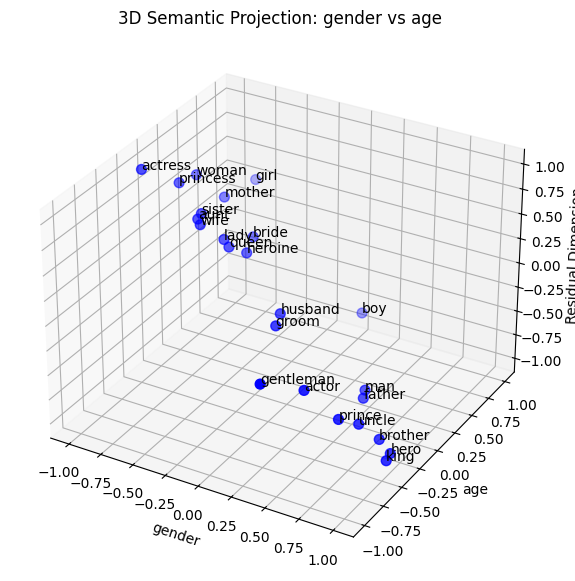

In [6]:
visualize_words_in_3d(gender_words, gender_pairs, age_pairs, 'gender', 'age', model=model)

In [ ]:
#@title Exercise

# 1: Think of a research problem where semantic projection could be a useful data
# analysis tool. Which dimensions would be necessary to highlight? How would you define them?
# Which individual concepts (words) would be interesting to project?

# 2: Implement the dimension definitions, create a list of concepts, and visualise your projections!
